## Search Tree -> Similar Words

In [1]:
csv_path = './data/sqlResult_1558435.csv'

In [2]:
import os

In [3]:
os.path.exists(csv_path)

True

In [4]:
import pandas as pd

In [5]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [6]:
content = content.fillna('')

In [7]:
content.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [49]:
news_content = content['content'].tolist()

In [50]:
import jieba

In [51]:
def cut(string): return ' '.join(jieba.cut(string))

In [52]:
cut('这是一个测试')

'这是 一个 测试'

In [53]:
import re

In [54]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [55]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [56]:
news_content = [token(n) for n in news_content]

In [57]:
len(news_content)

89611

In [58]:
print(news_content[0])

['此外', '自本周', '6月12日', '起', '除小米手机6等15款机型外', '其余机型已暂停更新发布', '含开发版', '体验版内测', '稳定版暂不受影响', '以确保工程师可以集中全部精力进行系统优化工作', '有人猜测这也是将精力主要用到MIUI', '9的研发之中', 'MIUI', '8去年5月发布', '距今已有一年有余', '也是时候更新换代了', '当然', '关于MIUI', '9的确切信息', '我们还是等待官方消息']


In [59]:
news_content = [' '.join(n) for n in news_content]

In [60]:
news_content[:1]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息']

In [63]:
cut(news_content[2])

'此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量   惊喜   根据 京东 泄露 的 信息   一加 5 起 售价 是 xx99 元   应该 是 在 2799   2899   2999 中 的 某个'

In [64]:
news_content = [cut(n) for n in news_content]

In [65]:
len(news_content)

89611

In [66]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [67]:
with open('news-sentences-cut.txt', 'w', encoding='utf8') as f:
    for n in news_content:
        f.write(n + '\n')

In [71]:
from gensim.models import Word2Vec

In [72]:
from gensim.models.word2vec import LineSentence

In [74]:
Word2Vec?

In [75]:
news_word2ve= Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)

In [76]:
news_word2ve.most_similar('葡萄牙', topn=20)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('捷克', 0.8672915101051331),
 ('意大利', 0.8525253534317017),
 ('克罗地亚', 0.8454985022544861),
 ('巴塞罗那', 0.8235341906547546),
 ('瑞士', 0.8135308027267456),
 ('摩洛哥', 0.8098884224891663),
 ('乌拉圭', 0.8071278929710388),
 ('索', 0.8041039705276489),
 ('丹麦', 0.8013482093811035),
 ('西班牙', 0.8000324964523315),
 ('罗马尼亚', 0.7968207597732544),
 ('奥地利', 0.7957209944725037),
 ('马德里', 0.7858061790466309),
 ('拉脱维亚', 0.7844109535217285),
 ('比什凯克', 0.7844077348709106),
 ('比利时', 0.7838754653930664),
 ('科特迪瓦', 0.7754402160644531),
 ('巴拉圭', 0.7748613953590393),
 ('黑文市', 0.7727378010749817),
 ('斯洛文尼亚', 0.7718468904495239)]

## More Date, Better Results

1. 分词的问题
2. **数据量**，数据越多，效果越好，维基百科加进来，那么同义词就要好很多。

In [77]:
news_word2ve.most_similar('捷克', topn=20)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('罗马尼亚', 0.9088071584701538),
 ('拉脱维亚', 0.8824584484100342),
 ('意大利', 0.8729462623596191),
 ('葡萄牙', 0.8672915101051331),
 ('比利时', 0.8607289791107178),
 ('匈牙利', 0.8548849821090698),
 ('丹麦', 0.8534164428710938),
 ('波兰', 0.8341460227966309),
 ('奥地利', 0.8164430260658264),
 ('乌拉圭', 0.8142130374908447),
 ('斯洛文尼亚', 0.806132972240448),
 ('爱尔兰', 0.8031853437423706),
 ('基辅', 0.8002790212631226),
 ('克罗地亚', 0.8001245260238647),
 ('立陶宛', 0.7995327115058899),
 ('津巴布韦', 0.7994288206100464),
 ('中国香港', 0.7994146347045898),
 ('白俄罗斯', 0.797614574432373),
 ('乌克兰', 0.797508180141449),
 ('保加利亚', 0.7972137331962585)]

In [79]:
news_word2ve.most_similar('说', topn=100)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('表示', 0.9060407876968384),
 ('认为', 0.8647439479827881),
 ('指出', 0.8475111722946167),
 ('看来', 0.8290128111839294),
 ('坦言', 0.8182457089424133),
 ('介绍', 0.7845182418823242),
 ('明说', 0.7616503238677979),
 ('称', 0.7563531398773193),
 ('文说', 0.7541820406913757),
 ('透露', 0.7442010641098022),
 ('告诉', 0.7321453094482422),
 ('强调', 0.7075918912887573),
 ('中说', 0.6916170120239258),
 ('所说', 0.6681145429611206),
 ('时说', 0.6364998817443848),
 ('提到', 0.6346604824066162),
 ('称赞', 0.6289868354797363),
 ('深有体会', 0.6189056634902954),
 ('如是说', 0.6172446012496948),
 ('坦说', 0.6084513068199158),
 ('道', 0.5804411172866821),
 ('的话', 0.5803701877593994),
 ('建议', 0.5786048173904419),
 ('确信', 0.5748284459114075),
 ('相信', 0.5684607028961182),
 ('特别强调', 0.5603676438331604),
 ('写道', 0.552329957485199),
 ('普遍认为', 0.5510092377662659),
 ('直言', 0.5472595691680908),
 ('说道', 0.5463616847991943),
 ('地说', 0.5410135984420776),
 ('叙林', 0.5402573943138123),
 ('问', 0.5369252562522888),
 ('林元庆', 0.5299052596092224),
 ('资深', 0.

In [80]:
news_word2ve.most_similar('认为', topn=30)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('指出', 0.9057178497314453),
 ('表示', 0.8907920718193054),
 ('说', 0.8647439479827881),
 ('看来', 0.8213793039321899),
 ('称', 0.8001088500022888),
 ('坦言', 0.7940620183944702),
 ('普遍认为', 0.7686386108398438),
 ('透露', 0.7454639673233032),
 ('强调', 0.7233943343162537),
 ('建议', 0.7016156911849976),
 ('所说', 0.6716853380203247),
 ('介绍', 0.6649230718612671),
 ('相信', 0.6344857215881348),
 ('告诉', 0.6341235041618347),
 ('呼吁', 0.6190996766090393),
 ('提到', 0.6115113496780396),
 ('不明智', 0.6059680581092834),
 ('而言', 0.6054043769836426),
 ('看好', 0.6042644381523132),
 ('表明', 0.5997722148895264),
 ('声称', 0.599672794342041),
 ('事实上', 0.5985932350158691),
 ('中说', 0.5918971300125122),
 ('对此', 0.5907052755355835),
 ('明说', 0.5898700952529907),
 ('说明', 0.5873211026191711),
 ('现阶段', 0.586159348487854),
 ('担心', 0.5804302096366882),
 ('资深', 0.5792628526687622),
 ('不过', 0.578912615776062)]

In [81]:
news_word2ve.most_similar('建议', topn=10)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('要求', 0.7343764901161194),
 ('认为', 0.7016156911849976),
 ('强调', 0.6876432299613953),
 ('提醒', 0.6805597543716431),
 ('指出', 0.6761874556541443),
 ('慎重', 0.661210298538208),
 ('必要', 0.6606169939041138),
 ('解释', 0.660605788230896),
 ('呼吁', 0.6448093056678772),
 ('折中', 0.6384769678115845)]

In [82]:
from collections import defaultdict

In [83]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [187]:
def get_similiar_words(initial_words, model):
    max_size = 500
    unseen = initial_words
    seen = defaultdict(int)
    
    words_to_explore = initial_words
    explored = defaultdict(int)
    
    while words_to_explore and len(explored) < max_size:
        if len(explored) % 10 == 0:
            print (len(explored))
        word = words_to_explore.pop(0)
        similar_words = [w for w, s in model.most_similar(word, topn=20)]
        
        words_to_explore += similar_words
        
        explored[word] += 1
    
    return explored

In [188]:
similiar_words = get_similiar_words(['说'], news_word2ve)

0
10
20
30
30
30
30
30
30
30

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



30
30
30
30
30
30
30
30
30
40
40
50
60
70
80
90
100
110
120
130
140
150
150
150
150
150
150
160
170
170
180
180
190
190
190
200
210
210
220
220
230
240
250
250
260
260
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
280
290
290
300
310
310
320
330
340
350
360
370
380
380
380
390
400
400
400
400
410
420
430
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
460
470
480
490


In [189]:
similiar_words

defaultdict(int,
            {'说': 75,
             '表示': 75,
             '认为': 65,
             '指出': 72,
             '看来': 55,
             '坦言': 74,
             '介绍': 59,
             '明说': 52,
             '称': 51,
             '文说': 32,
             '透露': 70,
             '告诉': 39,
             '强调': 46,
             '中说': 36,
             '所说': 52,
             '时说': 23,
             '提到': 57,
             '称赞': 36,
             '深有体会': 19,
             '如是说': 20,
             '坦说': 18,
             '普遍认为': 32,
             '呼吁': 26,
             '建议': 26,
             '接受': 13,
             '相信': 15,
             '不明智': 6,
             '而言': 14,
             '看好': 9,
             '表明': 6,
             '特别强调': 29,
             '条法司': 6,
             '中称': 21,
             '来说': 8,
             '直言': 22,
             '谈到': 17,
             '确信': 15,
             '觉得': 12,
             '地说': 12,
             '说道': 21,
             '写信给': 6,
             '获悉': 6,
             '了解

In [190]:
sorted(similiar_words.items(), key=lambda x: x[1], reverse=True)

[('说', 75),
 ('表示', 75),
 ('坦言', 74),
 ('指出', 72),
 ('透露', 70),
 ('认为', 65),
 ('介绍', 59),
 ('提到', 57),
 ('看来', 55),
 ('明说', 52),
 ('所说', 52),
 ('称', 51),
 ('强调', 46),
 ('告诉', 39),
 ('中说', 36),
 ('称赞', 36),
 ('文说', 32),
 ('普遍认为', 32),
 ('特别强调', 29),
 ('呼吁', 26),
 ('建议', 26),
 ('时说', 23),
 ('直言', 22),
 ('中称', 21),
 ('说道', 21),
 ('如是说', 20),
 ('提及', 20),
 ('深有体会', 19),
 ('坦说', 18),
 ('谈到', 17),
 ('声称', 17),
 ('还称', 16),
 ('谈论', 16),
 ('相信', 15),
 ('确信', 15),
 ('而言', 14),
 ('给出', 14),
 ('写道', 14),
 ('解释', 14),
 ('接受', 13),
 ('证实', 13),
 ('言', 13),
 ('觉得', 12),
 ('地说', 12),
 ('知情', 12),
 ('三军', 11),
 ('阐述', 11),
 ('引用', 11),
 ('回答', 11),
 ('农艺师', 10),
 ('祁', 10),
 ('感谢', 10),
 ('看好', 9),
 ('眼中', 9),
 ('时称', 9),
 ('感慨', 9),
 ('来说', 8),
 ('黄进', 8),
 ('宣称', 8),
 ('说法', 8),
 ('重申', 8),
 ('敦促', 8),
 ('反复强调', 8),
 ('政务司', 7),
 ('正如', 7),
 ('盛赞', 7),
 ('谈及', 7),
 ('说明', 7),
 ('当然', 7),
 ('不明智', 6),
 ('表明', 6),
 ('条法司', 6),
 ('写信给', 6),
 ('获悉', 6),
 ('了解', 6),
 ('据介绍', 6),
 ('中山大学', 6),
 ('市政管理', 6

In [84]:
len(news_word2ve.wv.vocab)

97927

In [85]:
related_words = get_related_words(['说', '表示'], news_word2ve)

seen length : 0


C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 50
seen length : 100
seen length : 150
seen length : 150
seen length : 150
seen length : 150
seen length : 150
seen length : 150
seen length : 200
seen length : 250
seen length : 250
seen length : 300
seen length : 350
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length : 450
seen length

In [87]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)[:40]

[('表示', 92),
 ('说', 89),
 ('指出', 86),
 ('坦言', 85),
 ('透露', 84),
 ('认为', 77),
 ('介绍', 69),
 ('提到', 65),
 ('看来', 64),
 ('明说', 60),
 ('称', 60),
 ('所说', 59),
 ('强调', 54),
 ('告诉', 46),
 ('中说', 43),
 ('称赞', 40),
 ('文说', 37),
 ('普遍认为', 37),
 ('特别强调', 34),
 ('呼吁', 31),
 ('建议', 31),
 ('时说', 28),
 ('中称', 25),
 ('直言', 24),
 ('如是说', 23),
 ('提及', 23),
 ('深有体会', 22),
 ('说道', 22),
 ('坦说', 21),
 ('谈到', 20),
 ('还称', 19),
 ('声称', 19),
 ('相信', 17),
 ('谈论', 17),
 ('而言', 16),
 ('确信', 16),
 ('证实', 16),
 ('给出', 16),
 ('写道', 16),
 ('解释', 16)]

In [88]:
news_word2ve.most_similar('说', topn=40)

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('表示', 0.9060407876968384),
 ('认为', 0.8647439479827881),
 ('指出', 0.8475111722946167),
 ('看来', 0.8290128111839294),
 ('坦言', 0.8182457089424133),
 ('介绍', 0.7845182418823242),
 ('明说', 0.7616503238677979),
 ('称', 0.7563531398773193),
 ('文说', 0.7541820406913757),
 ('透露', 0.7442010641098022),
 ('告诉', 0.7321453094482422),
 ('强调', 0.7075918912887573),
 ('中说', 0.6916170120239258),
 ('所说', 0.6681145429611206),
 ('时说', 0.6364998817443848),
 ('提到', 0.6346604824066162),
 ('称赞', 0.6289868354797363),
 ('深有体会', 0.6189056634902954),
 ('如是说', 0.6172446012496948),
 ('坦说', 0.6084513068199158),
 ('道', 0.5804411172866821),
 ('的话', 0.5803701877593994),
 ('建议', 0.5786048173904419),
 ('确信', 0.5748284459114075),
 ('相信', 0.5684607028961182),
 ('特别强调', 0.5603676438331604),
 ('写道', 0.552329957485199),
 ('普遍认为', 0.5510092377662659),
 ('直言', 0.5472595691680908),
 ('说道', 0.5463616847991943),
 ('地说', 0.5410135984420776),
 ('叙林', 0.5402573943138123),
 ('问', 0.5369252562522888),
 ('林元庆', 0.5299052596092224),
 ('资深', 0.

## TFIDF Key words

In [89]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [90]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [91]:
document_frequency('的')

70342

In [92]:
import math

In [93]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [94]:
idf('的') < idf('小米')

True

In [98]:
idf('华为')

2.6736077228396447

In [99]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [100]:
content['content'][11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [101]:
tf('银行', news_content[11])

6

In [102]:
tf('创业板', news_content[11])

6

In [103]:
idf('创业板')

2.506757120518876

In [104]:
idf('银行')

1.4550169427748936

In [105]:
idf('短期')

1.9923664854640575

In [106]:
tf('短期', news_content[11])

3

In [107]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [108]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [109]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [110]:
%prun get_keywords_of_a_ducment(news_content[0])

In [111]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[101])

In [112]:
news_content[101]

'中国 经济网 6 月 23 日讯   记者 刘瑾   日前   中国 机械 工业 百强 企业   汽车 三十 强 企业名单 出炉   在 由 中国 机械 工业 联合会   中国汽车工业协会 主办 的   中国 机械 工业 百强 企业   汽车 工业 三十 强 企业 信息 发布会   上   中国 机械 工业 联合会 会长 王瑞祥 指出   入围 企业 总体 呈现 了 持续增长 态势   2016 年 总 规模   平均 规模 均 创新 高   我国 机械 工业 总体 上 呈现 稳中 向 好 的 发展 态势   主要 经济指标 出现 恢复性 增长   同时   王瑞祥 也 表示   机械 工业 长期 积累 的 结构性 矛盾 还 没有 根本性 改变   新 的 发展 业态   发展 模式 远 未 形成   保持 平稳 健康 发展 的 基础 还 不 牢固   产业 升级   新旧 动能 转换   实现 由大 变强 任重道远   相关 数据 显示   2016 年 机械 百强 入围 企业 规模 是 15   4 亿元   比 上年 略 高   总 规模 达到 16992 亿元   平均 规模 169   92 亿元   两项 均 创新 高   相比 前 两年 的 前十强 排名   名单 基本 没有 什么 变化   只是 工程 机械行业 的 徐工   三一 和 中联重科 由于 之前 市场 环境 等 原因   整体 排位 后移 了 一 两位   但 仍 全部 在 十强 之 列   但 考虑 到 工程 机械行业 最近 以来 的 强烈 增长 态势   明年 该 行业 整体 恢复性 可能 较大   中机联 执行 副会长 陈斌 表示   机械 百强 的 年 换位 率 2005 年 曾 高达 32   此后 逐年 下降   2012 年降 至 6   不过 近几年 又 在 上升   2016 年 升至 22   说明 市场 动荡   不 确定 因素 增加   根据 中机联 公布 的 数据   2017 年 1 至 5 月 机械 增加值 增速 好于 去年 但 呈现 逐月 回落 的 态势   比如 1 至 5 月 增速 为 10   7   比 1 至 4 月 回落 0   2 点   此外 利润总额 也 出现 了 同样 的 走势   专家 分析   这是 由于 钢铁 等 原材料 价格 近

In [113]:
get_keywords_of_a_ducment(news_content[101])

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('16992', 4.9523613237924735),
 ('但远', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('前十强', 4.253391319456455),
 ('后移', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('更新改造', 4.17421007340883),
 ('机械类', 4.17421007340883),
 ('相当规模', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

## Wordcloud

In [116]:
import wordcloud

In [117]:
wc = wordcloud.WordCloud('./data/SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [120]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [121]:
import matplotlib.pyplot as plt

In [122]:
%matplotlib inline

In [123]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [124]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

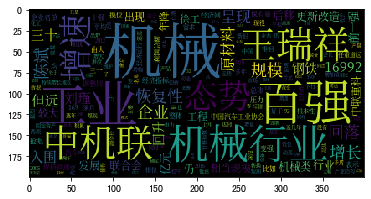

In [125]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [126]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[4])

In [127]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('南坪', 23.465811831805492),
 ('交警', 15.805787932978273),
 ('坂田', 13.953993984385477),
 ('黄衣', 13.050903997393533),
 ('巡防', 11.328810194210376),
 ('了', 11.012005636840637),
 ('轻生', 10.382998889874603),
 ('护栏', 9.32178985133465),
 ('坂雪岗', 9.302662656256985),
 ('裸身', 9.302662656256985),
 ('她', 9.285022817533253),
 ('约会', 9.267115391016052),
 ('深圳', 9.139285494790956),
 ('发现', 8.685059498920872),
 ('蜀黍', 8.214526567556433),
 ('网友', 8.126865289542744),
 ('突然', 8.047379355439626),
 ('十多分钟', 7.746360155489698),
 ('内裤', 7.746360155489698),
 ('着', 7.69376356788892),
 ('铁骑', 7.496482682273098),
 ('大概', 7.478906508099729),
 ('缓慢', 7.465405004419699),
 ('龙岗', 7.181266975549762),
 ('快速路', 7.108842630240872),
 ('大道', 6.863158044709045),
 ('环城', 6.816586558884396),
 ('辅警', 6.7921176460503725),
 ('往前走', 6.722593433531949),
 ('走', 6.658635364608071),
 ('视频', 6.65823837544899),
 ('市民', 6.50820380832565),
 ('精神病', 6.4895822953890745),
 ('主干道', 6.4

In [129]:
from PIL import Image

In [130]:
import numpy as np

In [136]:
police_mask = np.array(Image.open('./data/mask.png'))

In [140]:
print(police_mask)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [135]:
os.path.exists("./data/mask.png")

True

In [137]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf', 
mask=police_mask
)

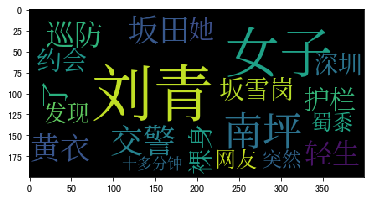

In [133]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

In [138]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

OSError: cannot open resource

## TFIDF Vectorizezd

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
vectorized = TfidfVectorizer(max_features=10000)

In [146]:
news_content[:1]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息']

In [144]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [145]:
X = vectorized.fit_transform(sub_samples)

In [147]:
X.shape

(50000, 10000)

In [148]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982

In [149]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64))

In [150]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [151]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982

In [152]:
import random 

In [153]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [154]:
document_id_1

832

In [155]:
document_id_2

713

In [156]:
news_content[document_id_1]

'中 北京 时间 21 日 凌晨   投资者 即将 迎来 MSCI 的 2017 年度 市场 分类 评审 结果   该 机构 是否 会 将 A股 纳入 其 国际 指数 备受 外界 关注   彭博 中国 经济学家 陈世渊 认为   相较 于 把 A股 纳入 MSCI 全球 指数   作为 试点 和 折中 方案   MSCI 有 可能 先 把 A股 纳入 MSCI 中国 指数   目前 MSCI 中国 指数 主要 由 H股 等 非 A股 构成   陈世渊 在 接受 中国 证券网 记者 采访 时 表示   MSCI 认为 国内 交易所 对 海外 投资者 发行 A股 相关 产品 的 事前 审批 规定   可能 会 对 MSCI 产品 投资者 构成 投资 障碍   妨碍 目前 MSCI 指数 的 运用   而 对 国际 投资者 来说   目前 把 A股 纳入 MSCI 指数   象征意义 大于 实质 意义   他 表示   在 MSCI 的 新兴 市场 指数 和 亚洲   除去 日本   指数 里   H股 等 非 A股 已经 占到 30   的 份额   已经 具有 一定 代表性   讨论 中 的 新增 A股   在 MSCI 新兴 市场 指数 中 也 只 占 0   5   这 对 国际 投资者 寻求 更高 投资收益 或 分散 投资 风险   并 没有 特别 实质 意义   陈世渊 表示   在 MSCI 去年 所 列出 的 三个 主要 障碍 中   有 两个 已经 基本 扫清   深港 通 开通   扩大 了 市场准入   而 交易所 新 的 停牌 政策 也 限制 了 上市公司 随意性 停牌   但是 第三个 障碍   也 就是 对 MSCI 相关 产品 发行 的 事先 批准 的 规定   短期内 很难 得到 解决   目前 A股 比较稳定   没有 迫切需要 引入 外资 支持 股市   这种 情况 下   目前 政策 做出 调整 以 满足 第三个 条件 的 可能性 较 小'

In [157]:
news_content[document_id_2]

'绿营 政治 人物 的 两岸 论述 近期 纷纷 转向   图片 来源   中 时 电子报   环球网 综合 报道   据 台湾   中 时 电子报   6 月 20 日 报道   针对 台南市 长赖 清德 以及 一众 绿营 政治 人物 围绕 着   九二 共识   的 表态   国民党 文传 会 副 主委 洪孟楷 20 日 上午 表示   民进党 常 说不清楚 什么 叫   九二 共识   一中 各表   但 民进党 内 近日 对 两岸 论述 却   各自 表述   起来   无论是   亲中   知中   友中   和 中   很 明显 地   民进党 内 政治 人物 的   各自 表述   他 质问   这 是否 意味 蔡 英文 已经 提前   跛脚   所以 党内 纷纷 项庄舞剑   洪孟楷 认为   蔡 英文 没有 能力 让 台湾 人民 过 好日子   又 没 办法 维持 两岸 正常 交流   所以 挑战 四起   洪孟楷 表示   邱义仁 说   模糊   是 现在 台湾 两岸 策略 最好 的 态度   还要 模糊 到 大陆 也 清楚 我们 的 模糊   这 根本就是 为 过去 一年 蔡 政府 错误 的 两岸 政策 打 模糊 仗   连 蔡 的 重要 幕僚 都 只会 模糊   那 民众 想 问   这个   政府   从上到下   到底 谁 对 两岸 政策 清楚   说不清   讲 不明   每天 只会   文青 口号 治台   就是 过去 一年 多 蔡 当局 最大 的 问题   洪 又 说   台南市 长赖 清德 也 不该 模糊 谈话   尤其 是   九二 共识   和   一国两制   两个 毫不 相连 的 名词 兜 在 一起   九二 共识   就是   九二 共识   一国两制   是   一国两制   国民党 的 主张 两岸 交流 就是   九二 共识   一中 各表   从来 没说 过   也 不 认同 两岸 问题 上要 以   一国两制   解决   从 过去 到 现在 都 不曾有过   洪孟楷 批评   赖清德 是 想争   大位   之 人   就 应该 说明 清楚   自己 的 两岸 政策 到底 为何   不要 在 台南 说 一套   在 美国 讲 一套   如果   九二 共识 不是 问题   的话   是否 愿意 当 民进党 表态

In [158]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [159]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [160]:
random_choose = random.randint(0, 1000)

In [161]:
random_choose

156

In [162]:
news_content[random_choose]

'北京 时间 6 月 20 日 消息   日前 在 英格兰 曼彻斯特 沃斯利 高尔夫 俱乐部   Worsley   Golf   Club   举行 的 一场 男子 高尔夫 比赛 中   前 曼联 球星 瑞恩   吉格斯   Ryan   Giggs   成为 话题 人物   他 因 没交 5 英镑 的 报名费 而 被 取消 了 比赛 资格   参赛 的 球员 们 需要 在 比赛 的 前一天 交纳 5 英镑 的 现金   但 吉格斯 和 他 的 朋友 托尼   卡米 莱利   Tony   Camilleri   没 交钱 就 直接 去 比赛 了   当 比赛结果 在 沃斯利 高尔夫 俱乐部 的 网站 上 公布 时   差点 为 14 的 吉格斯 排在 144 名中 的 最后 一位   名字 前面 标着   DQ   也就是说 他 被 取消 了 比赛 资格   网站 上 还 说明 取消 他 比赛 资格 的 原因 是 他 没 支付 报名费   会所里 为此 笑声 一片   一位 比赛 者 说   吉格斯 银行 里 存款 可 不少   所以 我们 都 笑 了   他 在 俱乐部 是 很 受欢迎 的 人   但 规则 就是 规则   任何人 参加 比赛 都 要 在 俱乐部 的 专卖店 支付 5 英镑 的 现金   我 相信 这 只是 个 疏忽   但 不管怎么 说 他 还是 和 自己 的 同伴 打 了 球   看到 他 的 名字 在 比分 榜 垫底   大家 都 笑 了   我 想 他 自己 也 会 看到 这件 事情 有趣 的 一面   吉格斯 在 其 23 年 的 职业 足球 生涯 中 一直 效力 于 英超 曼联 俱乐部   并 帮助 曼联 赢得 了 13 座 英超 联赛 冠军   2 座 欧冠 冠军   4 次 英格兰 足总杯 冠军 等 36 座 冠军 奖杯   多年 来   吉格斯 一直 是 沃斯利 高尔夫 俱乐部 的 会员   会费 是 每年 950 英镑   而 在 效力 红魔 的 最后 几年   他 的 周薪 是 8 万英镑   沃斯利 高尔夫 俱乐部 随后 给 所有 的 会员 发邮件 说   我们 提醒 所有 的 会员 注意   参加 任何 比赛 都 需要 在 比赛 的 前一天 按 要求 交纳 一定 数额 的 现金   我们 得知   很多 会员 没有 带

In [163]:
from scipy.spatial.distance import cosine

In [164]:
def distance(v1, v2): return cosine(v1, v2)

In [165]:
distance([1, 1], [2, 2])

0.0

In [166]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.994483445526207

In [167]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9757075222629863

In [168]:
news_content[320]

'点击 图片 进入 下 一页   庭审 现场   李小华   摄   中新网 自贡 6 月 23 日电   刘刚   李小华   叶 卫东   23 日 下午   四川 自贡市 中级 人民法院 集中 公开 宣判 了 4 起 毒品 案件   毒品 总量 约 为 15890 克   涉案 被告人 16 人   其中   判处 无期徒刑 2 人   十年 以上 有期徒刑 5 人   据悉   目前   自贡市 制造 毒品 案件 增长 较 快且 数量 大   仅 今年 上半年   就 破获 3 件 制造 毒品 数量 巨大 的 案件   自贡市 中院 新闻 发言人 在 随后 召开 的 新闻 通气会 上 披露   2016 年 6 月 到 2017 年 5 月   全市 两级 法院 共 审理 毒品 犯罪案件 213 件   涉案 被告人 250 人   同比 上升 11   和 14   其中   贩卖   运输 案件 117 件   涉案 被告人 132 人   制造 毒品 案件 18 件   涉案 被告人 31 人   非法 持有 毒品   容留 他人 吸毒 案件 78 件   涉案 被告人 89 人   点击 图片 进入 下 一页   据介绍   自贡市 毒品 主要 来源于 国外   国内 两条 线路   国外 主要 是 老挝   缅甸   国内 主要 是 广东   云南   此外   近年来 出现 的 新型 毒品 也 造成 了 极大 的 社会 危害'

In [169]:
news_content[72]

'央广网 西安 6 月 19 日 消息   记者 雷恺   陕西省 今年 将 招录 250 名 中央财政 支持 中西部 农村 订单 定向 免费 本科 医学生   其中 临床医学 200 名   中医学 50 名   培养 计划 重点 向 贫困地区   革命 老区 倾斜   据介绍   国家 免费 医学生 只 招收 农村 学生   报考者 须 同时 具备 两个 条件   一是 已 参加 2017 年 陕西省 普通高校 招生 考试 报名   二是 本人 及 父亲 或 母亲 或 法定 监护人 户籍地 须 在 陕西省 农村   本人 具有 当地 连续 3 年 以上 户籍   国家 免费 医学生 录取 后   获得 入学 通知书 前   须 与 培养 高校 和 定向 就业 所在地 的 县级 卫生 计生   人力资源 社会保障 行政部门 签署 统一 制式 的 定向培养 和 就业 协议   承诺 毕业 后 到 有关 基层 医疗卫生 机构 服务 6 年   含 3 年 全科 专业 住院医师 规范化 培训   未 按 入学 前 签署 的 协议 规定 履约 的   退还 已 减免 的 教育 培训 费用   生活 补助 和 以上 费用 50   的 违约金   履约 情况 纳入 医师 诚信 管理   公布 违约 记录   并 记入 人事档案   国家 免费 医学生 毕业 后 拒绝 履约 的   5 年内 不得 应聘 全省 行政 范围 内 的 各级 各类 事业单位   免责 声明   本文 仅 代表 作者 个人观点   与 环球网 无关   其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实   对 本文 以及 其中 全部 或者 部分 内容   文字 的 真实性   完整性   及时性 本站 不 作 任何 保证 或 承诺   请 读者 仅作 参考   并 请 自行 核实 相关 内容'

In [170]:
news_content[85]

'央广网 烟台 6 月 19 日 消息   记者 刘颖超   通讯员 蒋毅   牟 辰龙   6 月 17 日 下午   山东 烟台 系山 边防 派出所 民警 来到 荣成市 寻 山镇   将 涉嫌 非法拘禁 的 犯罪 嫌疑人 曲某 抓获   至此   4 名 涉嫌 非法拘禁 的 犯罪 嫌疑人 已 全部 落网   据 了解   家住 龙湖 葡 醍 海湾 小区 的 夏 某于 6 月 15 日 上午 带 儿子 外出 期间   在 其 地下 车库 被 四名 从 威海 荣成 赶来 要账 的 鞠 某 等 四人 截住   鞠某 以夏 某 拖欠 工程款 为 由   要求 与 夏 某 找个 地方 好好 谈谈   但 夏 某 不 认为 自己 拖欠 鞠某 等 人 工程款   且 有 法院 判决   遂 拒 不 配合   鞠某 等 人 情绪 激烈   强行 将 夏 某 拖拽 到 车上   并 对 夏 某 进行 殴打   要求 夏某 配合 他们 找 地方 谈 拖欠 工程款 的 问题   鞠某 等 人 驱车 强行 将 夏 某 带到 了 威海 经济 技术开发区   但 看到 躺 在 车 后排 的 夏 某 一直 处于 迷糊 状态   心中 也 产生 了 担忧   于是 又 驱车 从 威海 将 鞠 某 送回 了 烟台市 牟平区 龙湖 葡 醍 海湾 小区   此时   山东 烟台 系山 边防 派出所 民警 正 对照 监控 逐个 排查 外地 可疑 车辆   看到 鞠某 等 人 驱车 返回   遂 传唤 到 派出所 接受 调查   经 询问   曲某 在 乘车 到达 威海 时 就 已 下车   而 鞠 某 等 人 以为 这次 来 牟平 只是 单纯 要账   没想到 自己 的 行为 却 触犯 了 刑法 有关 规定   他们 对 自己 不 懂法 的 行为 后悔不已   目前   鞠某 等 人 因涉嫌 非法拘禁 罪 被 公安机关 依法 刑事拘留   免责 声明   本文 仅 代表 作者 个人观点   与 环球网 无关   其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实   对 本文 以及 其中 全部 或者 部分 内容   文字 的 真实性   完整性   及时性 本站 不 作 任何 保证 或 承诺   请 读者 仅作 参考   并 请 自行 核实 相关 内容'

In [171]:
news_content[8]

'原 标题   武汉 警方 一下子 抓 了 808 人   还 都 是 俊男靓女   原来 他们 每天 偷偷摸摸 干 这事   武汉 警方 一下子 抓 了 808 人   还 都 是 俊男靓女   原来 他们 每天 偷偷摸摸 干 这事   大家 还 记得 今年 4 月 光谷 曾 发生 的 一件 大事 吗   当时 微博 和 朋友圈 上 都 传 疯 了   说 是 光谷 国际 广场 大量 白领 被捕   现场 手铐 都 不够 用   结果 经 记者 深入调查 后 发现   这些 被 抓 的 并 不是 网传 的   白领   而是 一个 有 282 名 涉案人员 的 诈骗 团伙   天呐   接近 300 人 的 犯罪团伙   你 以为 这个 数字 已经 够 庞大 了 吗   错   还有 让 你 更 震惊 的   据 武汉市公安局 通报   6 月 9 日   警方 在 武汉三镇 的 10 处 窝点 内   抓获 了 808 名 嫌疑人   而且 令人 大跌眼镜 的 是   他们 当中 大多 都 是 年青人   用   俊男靓女   来 形容 也 不为过   年纪 不 大   外形 不差   那么 到底 是 犯 了 什么 事 呢   其实 说 起来   这 事 估计 绝大多数 人 都 碰到 过   那 就是 网络 诈骗   涉案 电脑 800 余台   手机 2000 余部   银行卡 3000 余张   因为 涉及 的 账户 太 多   涉案 金额 目前 还 没 统计 出来   这是 全国 涉案人 数最多 的 一起 特大 网络 诈骗案   这些 惊人 的 数字 背后   究竟 藏 着 什么样 的 秘密   警方 把 他们 一锅端 了   今年 4 月   武汉 警方 获悉 在 塔子 湖 地区 有 电信 网络 诈骗 活动   经过 2 个 多月 的 秘密 侦查   发现 了 一个 特大 网络 诈骗 犯罪团伙   原来 该 团伙 利用 非法 互联网 金融 平台   实施 推荐 股票   炒 期货 等 诈骗   其 10 处 窝点 散布 在 江岸   洪山   东湖 高新   硚口   江汉 等 5 个区 的 写字楼 内   涉案人员 多达 800 余名   6 月 9 日 上午   武汉 警方 组织 了 1000 余名 警力   分成 14 个 抓捕 组   同时 对 

In [172]:
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[352,
 1126,
 301,
 59,
 69,
 28,
 35,
 33,
 99,
 48,
 81,
 109,
 43,
 42,
 92,
 108,
 38,
 49,
 8,
 24,
 93,
 116,
 80,
 77,
 37,
 52,
 85,
 86,
 36,
 22,
 110,
 13,
 34,
 65,
 83,
 7,
 64,
 98,
 105,
 11,
 73,
 54,
 61,
 9,
 21,
 27,
 4,
 91,
 95,
 20,
 46,
 101,
 12,
 0,
 119,
 6,
 84,
 115,
 97,
 29,
 70,
 71,
 45,
 113,
 51,
 62,
 96,
 30,
 14,
 26,
 41,
 56,
 72,
 66,
 58,
 25,
 67,
 44,
 31,
 55,
 5,
 106,
 53,
 94,
 102,
 47,
 90,
 40,
 114,
 60,
 16,
 112,
 10,
 75,
 88,
 74,
 111,
 15,
 1,
 78,
 23,
 57,
 17,
 19,
 79,
 63,
 82,
 68,
 50,
 104,
 117,
 89,
 118,
 2,
 3,
 18,
 32,
 39,
 87,
 100,
 103,
 156,
 466,
 155,
 278,
 921,
 529,
 506,
 341,
 223,
 1073,
 1049,
 1061,
 1110,
 1109,
 1101,
 1116,
 967,
 1069,
 984,
 1075,
 1076,
 977,
 1063,
 973,
 965,
 1112,
 981,
 1107,
 1056,
 1095,
 1053,
 975,
 1119,
 1043,
 1103,
 971,
 1086,
 1065,
 996,
 1111,
 1087,
 1118,
 987,
 972,
 1067,
 1093,
 998,
 1089,
 979,
 1044,
 1092,
 1040,
 1080,
 1070,
 989,
 1106,
 1050,
 1094,

In [173]:
2**64

18446744073709551616

In [174]:
bin(19)

'0b10011'

In [175]:
bin(49)

'0b110001'

In [176]:
bin(38)

'0b100110'

In [177]:
bin(49 & 38)

'0b100000'

## Build Search Engine 

```
Input: Words
Output: Documents
```

In [ ]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [ ]:
%%timeit
naive_search('美军 司令 航母'.split())

In [ ]:
len(news_content)

### Input word -> the documents which contain this word

In [ ]:
X.shape

In [ ]:
transposed_x = X.transpose().toarray()

In [ ]:
word_2_id = vectorized.vocabulary_

In [ ]:
word_2_id['今天']

In [ ]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [ ]:
id_2_word[6195]

In [ ]:
set(np.where(transposed_x[6195])[0])

In [ ]:
'美军'

In [ ]:
word_2_id['美军']

In [ ]:
word_2_id['司令']

In [ ]:
usa_force = set(np.where(transposed_x[7922])[0])

In [ ]:
commander = set(np.where(transposed_x[2769])[0])

In [ ]:
usa_force & commander

In [ ]:
from functools import reduce

In [ ]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [ ]:
from operator import and_

In [ ]:
reduce(and_, [d1, d2, d3])

In [ ]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [ ]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

In [ ]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [ ]:
print(text)

In [ ]:
import re

In [ ]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [ ]:
pat = r'(新闻|官员)'

In [ ]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

In [ ]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [ ]:
get_query_pat('美军 司令 航母')

In [ ]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [ ]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

In [ ]:
from IPython.display import display, Markdown

In [ ]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [ ]:
search_engine_with_pretty_print('春节 假期')

In [ ]:
search_engine()

In [ ]:
#%%timeit
search_engine('美联储 加息 次数')

In [ ]:
content['content'][2189]

## Why ?

```
preprocessing
```

## PageRank

In [ ]:
import networkx as nx

In [ ]:
import random

In [ ]:
from string import ascii_uppercase

In [ ]:
ascii_uppercase

In [ ]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [ ]:
genearte_random_website()

In [ ]:
websites = [genearte_random_website() for _ in range(25)]

In [ ]:
websites

In [ ]:
random.sample(websites, 10)

In [ ]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [ ]:
website_network = nx.graph.Graph(website_connection)

In [ ]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [ ]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)